In [1]:
import tensorflow as tf
from  view_weights import SRCNN
import os

%load_ext autoreload
%autoreload 2

/Users/btopiwala/miniconda2/envs/cs231N/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from builtins import range
from past.builtins import xrange

from math import sqrt, ceil
import numpy as np

import pylab as pl
import matplotlib.cm as cm
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_grid(Xs, ubound=255.0, padding=1):
    """
    Reshape a 4D tensor of image data to a grid for easy visualization.

    Inputs:
    - Xs: Data of shape (N, H, W, C)
    - ubound: Output grid will have values scaled to the range [0, ubound]
    - padding: The number of blank pixels between elements of the grid
    """
    (N, H, W, C) = Xs.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = Xs[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                # grid[y0:y1, x0:x1] = Xs[next_idx]
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    # grid_max = np.max(grid)
    # grid_min = np.min(grid)
    # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
    return grid

('srcnn:', <view_weights.SRCNN object at 0x1c1c866bd0>)

Reading Checkpoints.....


INFO:tensorflow:Restoring parameters from /Users/btopiwala/Downloads/CS231N/2018/Project/gcloud-run-all-data/srcnn/non-keras/checkpoint_complete_data_epoch_300/srcnn_21/SRCNN.model-500

 Checkpoint Loading Success! /Users/btopiwala/Downloads/CS231N/2018/Project/gcloud-run-all-data/srcnn/non-keras/checkpoint_complete_data_epoch_300/srcnn_21/SRCNN.model-500


('w1:', <tf.Variable 'w1:0' shape=(9, 9, 1, 64) dtype=float32_ref>)
('w1:', (9, 9, 1, 64))


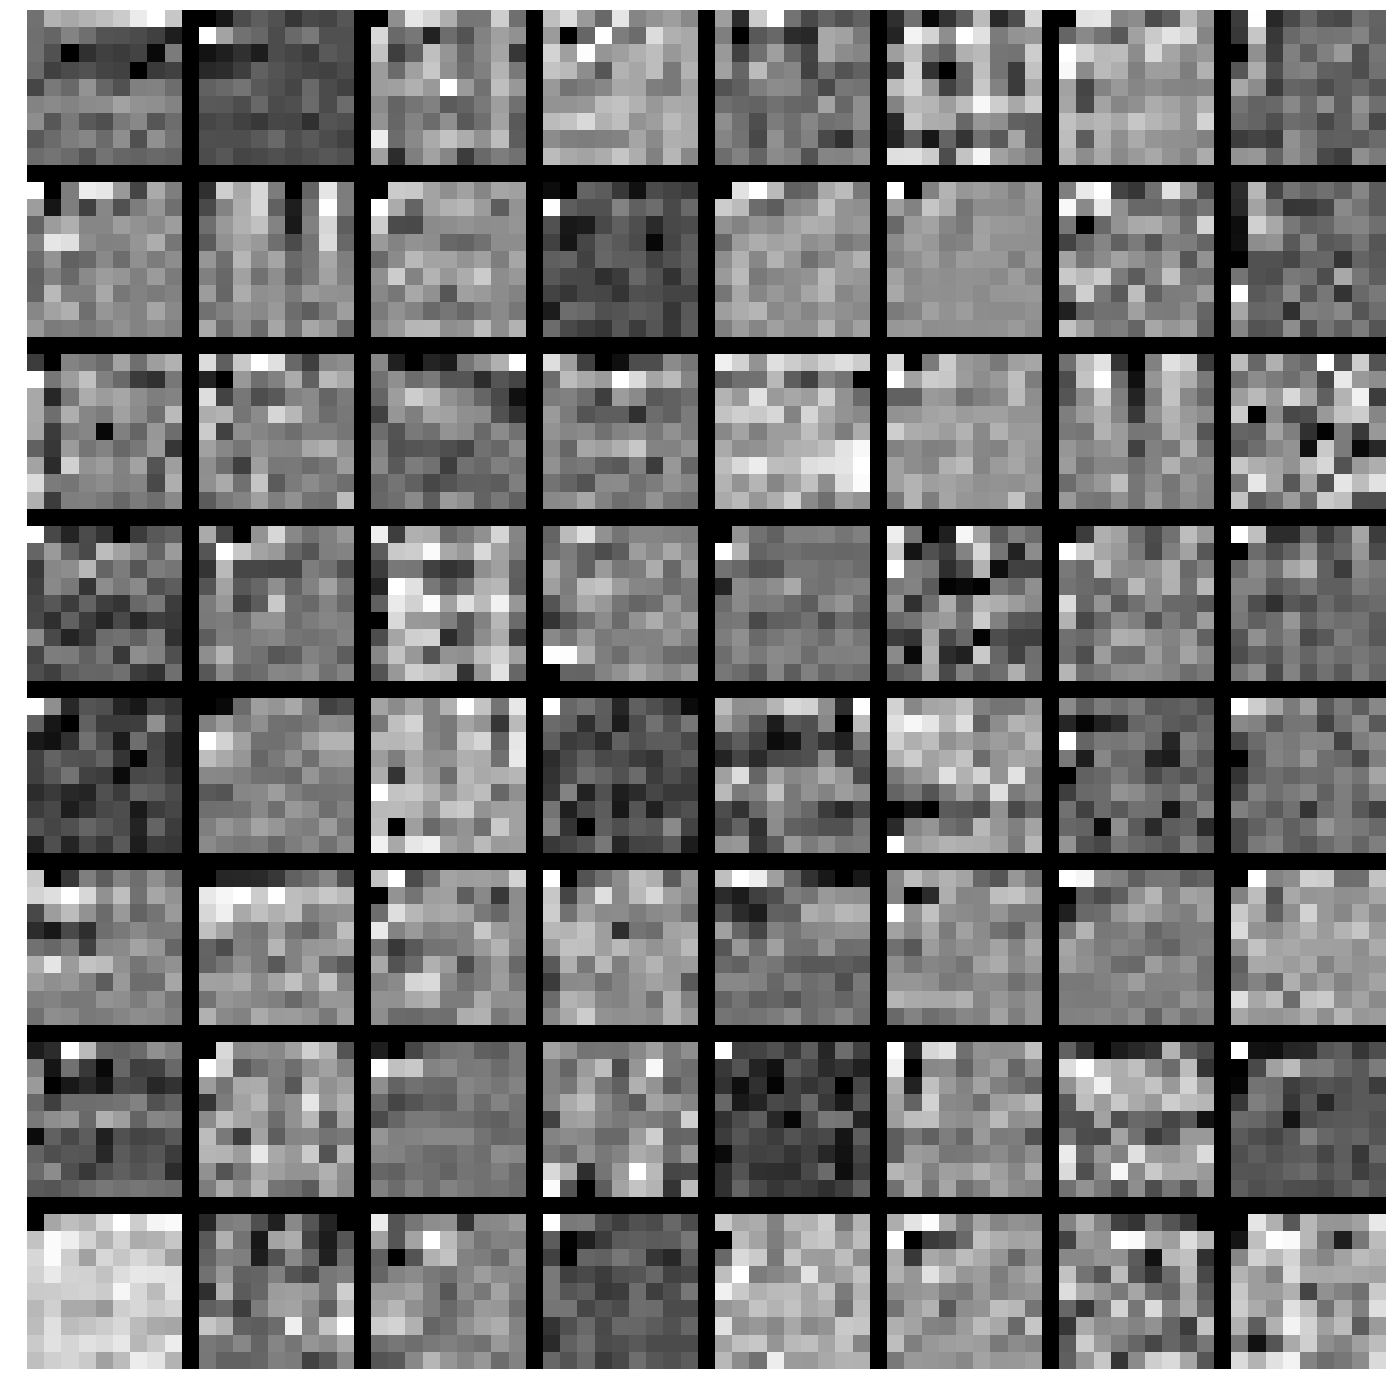

In [3]:
load_model_epoch = 500
checkpoint_dir = "/Users/btopiwala/Downloads/CS231N/2018/Project/gcloud-run-all-data/srcnn/non-keras/checkpoint_complete_data_epoch_300"

with tf.Session() as sess:
    
    srcnn = SRCNN(sess,
                      image_size = 33,
                      label_size = 21,
                      c_dim = 1)
    
    print("srcnn:", srcnn)
    
    srcnn.load(checkpoint_dir, load_model_epoch)
    
    w1 = srcnn.weights['w1']
    
    print("w1:", w1)
    
    w1 = w1.eval()
    
    print("w1:", w1.shape)
    
    grid = visualize_grid(w1.transpose(3, 0, 1, 2))
    plt.imshow(np.squeeze(grid.astype('uint8')), cmap='gray')

    plt.axis('off')
    plt.gcf().set_size_inches(25, 25)
    plt.show()
    